## Exploratory Data Analisys
Izquierda Diario

### Load tokens

In [1]:
import pandas as pd
import pickle

In [2]:
token_df = pd.read_pickle('tokens/topic_tokens_izq.pkl')

In [3]:
token_df

topics  abajo  abarca  abierta  abiertamente  abierto  abiertos  \
doc1   inflation      0       0        0             0        0         0   
doc2   inflation      0       0        0             0        0         0   
doc3   inflation      0       0        0             0        0         0   
doc4   inflation      1       0        0             0        0         0   
doc5   inflation      0       0        0             0        0         0   
...          ...    ...     ...      ...           ...      ...       ...   
doc57   exchange      0       0        0             0        0         0   
doc58   exchange      0       0        0             0        0         0   
doc59   exchange      0       0        0             0        0         0   
doc60   exchange      0       0        0             0        0         0   
doc61   exchange      0       0        0             0        0         0   

       abre  abril  abrilasi  ...  vuelven  vulnerables  wall  yendo  \
doc1      0      0         0  ...        0            0     0      0   
doc2      0      0         0  ...        0            0     0      0   
doc3      0      0         0  ...        0            0     0      0   
doc4      0      0         0  ...        0            0     0      0   
doc5      0      0         0  ...        0            0     0      0   
...     ...    ...       ...  ...      ...          ...   ...    ...   
doc57     0      0         0  ...        0            0     0      0   
doc58     0      0         0  ...        0            0     1      0   
doc59     0      0         0  ...        0            0     0      0   
doc60     0      0         0  ...        0            0     0      0   
doc61     0      0         0  ...        0            0     1      0   

       yerbalas  yield  yogurt  ypf  zarpado  zona  
doc1          0      0       0    0        0     0  
doc2          0      0       0    4        0     0  
doc3          0      0       0    6        0     0  
doc4          0      0       0    0        0     0  
doc5          0      0       0    0        0     0  
...         ...    ...     ...  ...      ...   ...  
doc57         0      0       0    0        0     0  
doc58         0      0       0    0        0     0  
doc59         0      0       0    0        0     0  
doc60         0      0       0    0        0     0  
doc61         0      0       0    0        1     0  

[61 rows x 3245 columns]

Get docs by topics

### Count words in/between doc(s)

#### Inflation topics

In [4]:
inflation = token_df[token_df.topics == 'inflation'].drop('topics', axis=1)

In [5]:
inflation.shape

(35, 3244)

In [6]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [7]:
top_words = count_words(inflation)

In [8]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc1
[('incremento', 3), ('aumento', 2), ('mientras', 2), ('marcas', 2), ('particulares', 2), ('productos', 2), ('anunciado', 2), ('box', 2), ('diferentes', 1), ('pasado', 1), ('dinamica', 1), ('american', 1), ('cuya', 1), ('trata', 1), ('gobierno', 1), ('toca', 1), ('lmcomo', 1), ('aplico', 1), ('recien', 1), ('pasara', 1), ('trimestral', 1), ('quedan', 1), ('economica', 1), ('pauperrimo', 1), ('habia', 1), ('contar', 1), ('ultima', 1), ('justificar', 1), ('ahora', 1), ('vale', 1)]
-------------
doc2
[('shell', 6), ('aumento', 5), ('ypf', 4), ('combustibles', 4), ('precios', 3), ('suba', 3), ('marca', 3), ('ajuste', 2), ('octubre', 2), ('economia', 2), ('subas', 2), ('aumentos', 2), ('fin', 2), ('diesel', 2), ('diciembre', 2), ('impacto', 2), ('pasa', 2), ('formula', 2), ('vpower', 2), ('cuenta', 2), ('similar', 2), ('inflacion', 2), ('lunes', 2), ('incremento', 2), ('ano', 2), ('goteo', 2), ('ingresos', 1), ('puede', 1), ('puma', 1), ('punto', 1)]
-------------
doc3
[('ypf', 6), ('au

#### Plot

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [10]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


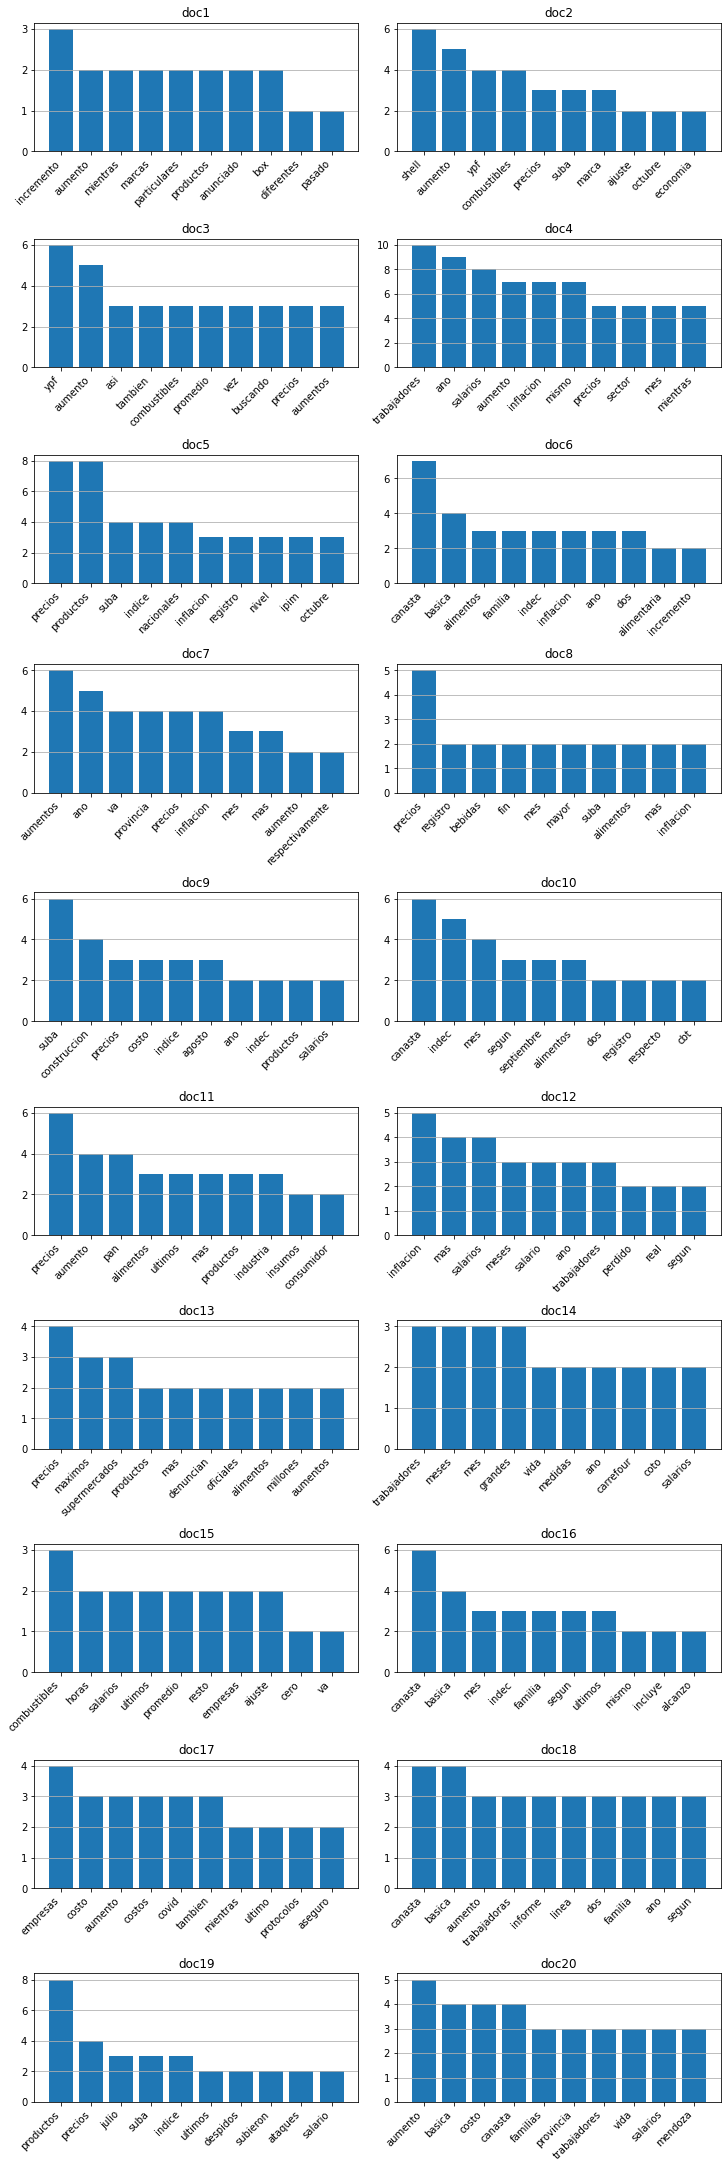

In [11]:
fig, axes = plt.subplots(nrows=10, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [12]:
from collections import Counter

In [13]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [14]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('precios', 21)
('inflacion', 20)
('aumento', 19)
('suba', 17)
('mes', 17)
('alimentos', 16)
('ano', 15)
('mas', 15)
('incremento', 12)
('trabajadores', 11)
('salarios', 11)
('indec', 11)
('bebidas', 10)
('productos', 9)
('segun', 9)
('basica', 9)
('promedio', 8)
('canasta', 7)
('ultimos', 7)
('gobierno', 6)
('ingresos', 6)
('mismo', 6)
('salario', 6)
('paritarias', 6)
('registro', 6)
('indice', 6)
('familia', 6)
('mientras', 5)
('aumentos', 5)
('tambien', 5)
('respecto', 5)
('nivel', 5)
('mayor', 5)
('general', 5)
('alza', 5)
('meses', 5)
('empresas', 5)
('costo', 5)
('millones', 5)
('cuarentena', 5)
('nacional', 5)
('combustibles', 4)
('octubre', 4)
('fin', 4)
('puede', 4)
('sector', 4)
('menos', 4)
('dos', 4)
('cba', 4)
('ser', 4)


#### Currency exchange news

In [15]:
exchange = token_df[token_df.topics == 'exchange'].drop('topics', axis=1)
exchange.shape

(26, 3244)

In [16]:
top_words = count_words(exchange)

In [17]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc36
[('dias', 5), ('local', 4), ('dolar', 4), ('cnv', 4), ('mep', 3), ('moneda', 3), ('bolsa', 3), ('bonos', 3), ('personas', 2), ('receptora', 2), ('luego', 2), ('venden', 2), ('mas', 2), ('humanas', 2), ('dos', 2), ('extranjera', 2), ('medidas', 2), ('netos', 2), ('pesos', 2), ('dolares', 2), ('permanencia', 2), ('realizan', 2), ('dispuso', 2), ('liquidacion', 2), ('disminuyo', 2), ('valor', 2), ('transferencia', 2), ('alycs', 2), ('parking', 2), ('tres', 2)]
-------------
doc37
[('dolar', 6), ('mientras', 3), ('dolares', 3), ('mep', 2), ('nuevas', 2), ('ccl', 2), ('oficial', 2), ('fmi', 2), ('areas', 1), ('tension', 1), ('record', 1), ('condensa', 1), ('tonelada', 1), ('rebaja', 1), ('liquidar', 1), ('paralelas', 1), ('economia', 1), ('paralelo', 1), ('mantiene', 1), ('liqui', 1), ('infierno', 1), ('parches', 1), ('contado', 1), ('pesar', 1), ('desgaste', 1), ('despues', 1), ('vaciadores', 1), ('contenerla', 1), ('ajuste', 1), ('dia', 1)]
-------------
doc38
[('dolar', 5), ('bonos

#### Plot

In [18]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


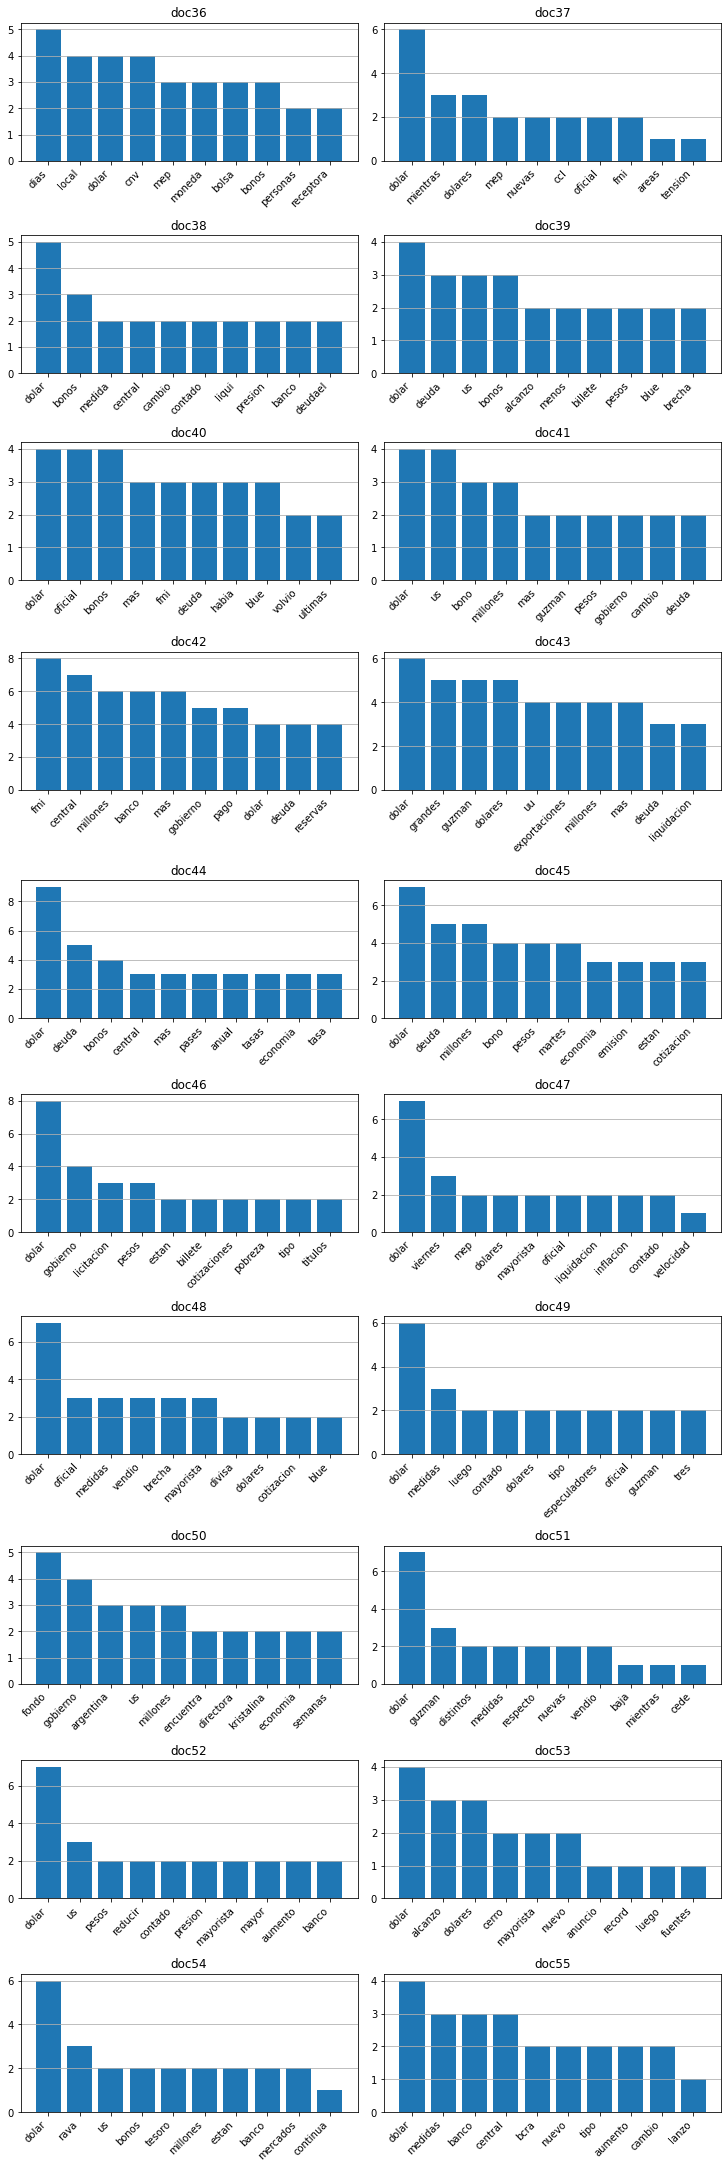

In [19]:
fig, axes = plt.subplots(nrows=10, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [20]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [21]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('dolar', 25)
('dolares', 15)
('banco', 14)
('us', 14)
('contado', 13)
('mas', 12)
('guzman', 12)
('bonos', 11)
('central', 11)
('deuda', 11)
('millones', 11)
('oficial', 10)
('blue', 10)
('medidas', 9)
('cambio', 9)
('gobierno', 9)
('pesos', 8)
('puede', 8)
('economia', 7)
('cerro', 7)
('devaluacion', 7)
('mep', 6)
('liquidacion', 6)
('liqui', 6)
('brecha', 6)
('dias', 5)
('luego', 5)
('fmi', 5)
('record', 5)
('dia', 5)
('mayorista', 5)
('interesar', 5)
('argentina', 5)
('tipo', 5)
('asi', 5)
('mientras', 4)
('paralelo', 4)
('subio', 4)
('alcanzo', 4)
('grandes', 4)
('fondo', 4)
('bancos', 4)
('haber', 4)
('nuevo', 4)
('aumento', 4)
('bolsa', 3)
('dispuso', 3)
('nuevas', 3)
('ajuste', 3)
('billete', 3)


The only words to be erased would be those who habe no contextual meaning.

In [22]:
more_stop_words = ['dia', 'fin','dias', 'dos', 'mas','ano', 'asi','puede', 'mes','incluso']

In [23]:
inflation.drop(more_stop_words, axis=1, inplace=True)

In [24]:
exchange.drop(more_stop_words, axis=1, inplace=True)

Tokens (manual) update

In [25]:
tokens_new = token_df.drop(more_stop_words, axis=1)

In [26]:
tokens_new.to_pickle('tokens/topic_tokens_izq_new.pkl')

### Visual Representation
#### Words Frequency

In [27]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pickle

In [29]:
df = pickle.load(open('data/df_clean_izq.pkl','rb'))
df_inflation = df.loc[df.topics == 'inflation', 'body'].values
df_exchange = df.loc[df.topics == 'exchange', 'body'].values

In [30]:
stopwords_sp = stopwords.words('spanish')
stopwords_sp = stopwords_sp + more_stop_words

In [31]:
cloud = WordCloud(stopwords=stopwords_sp, background_color='white')

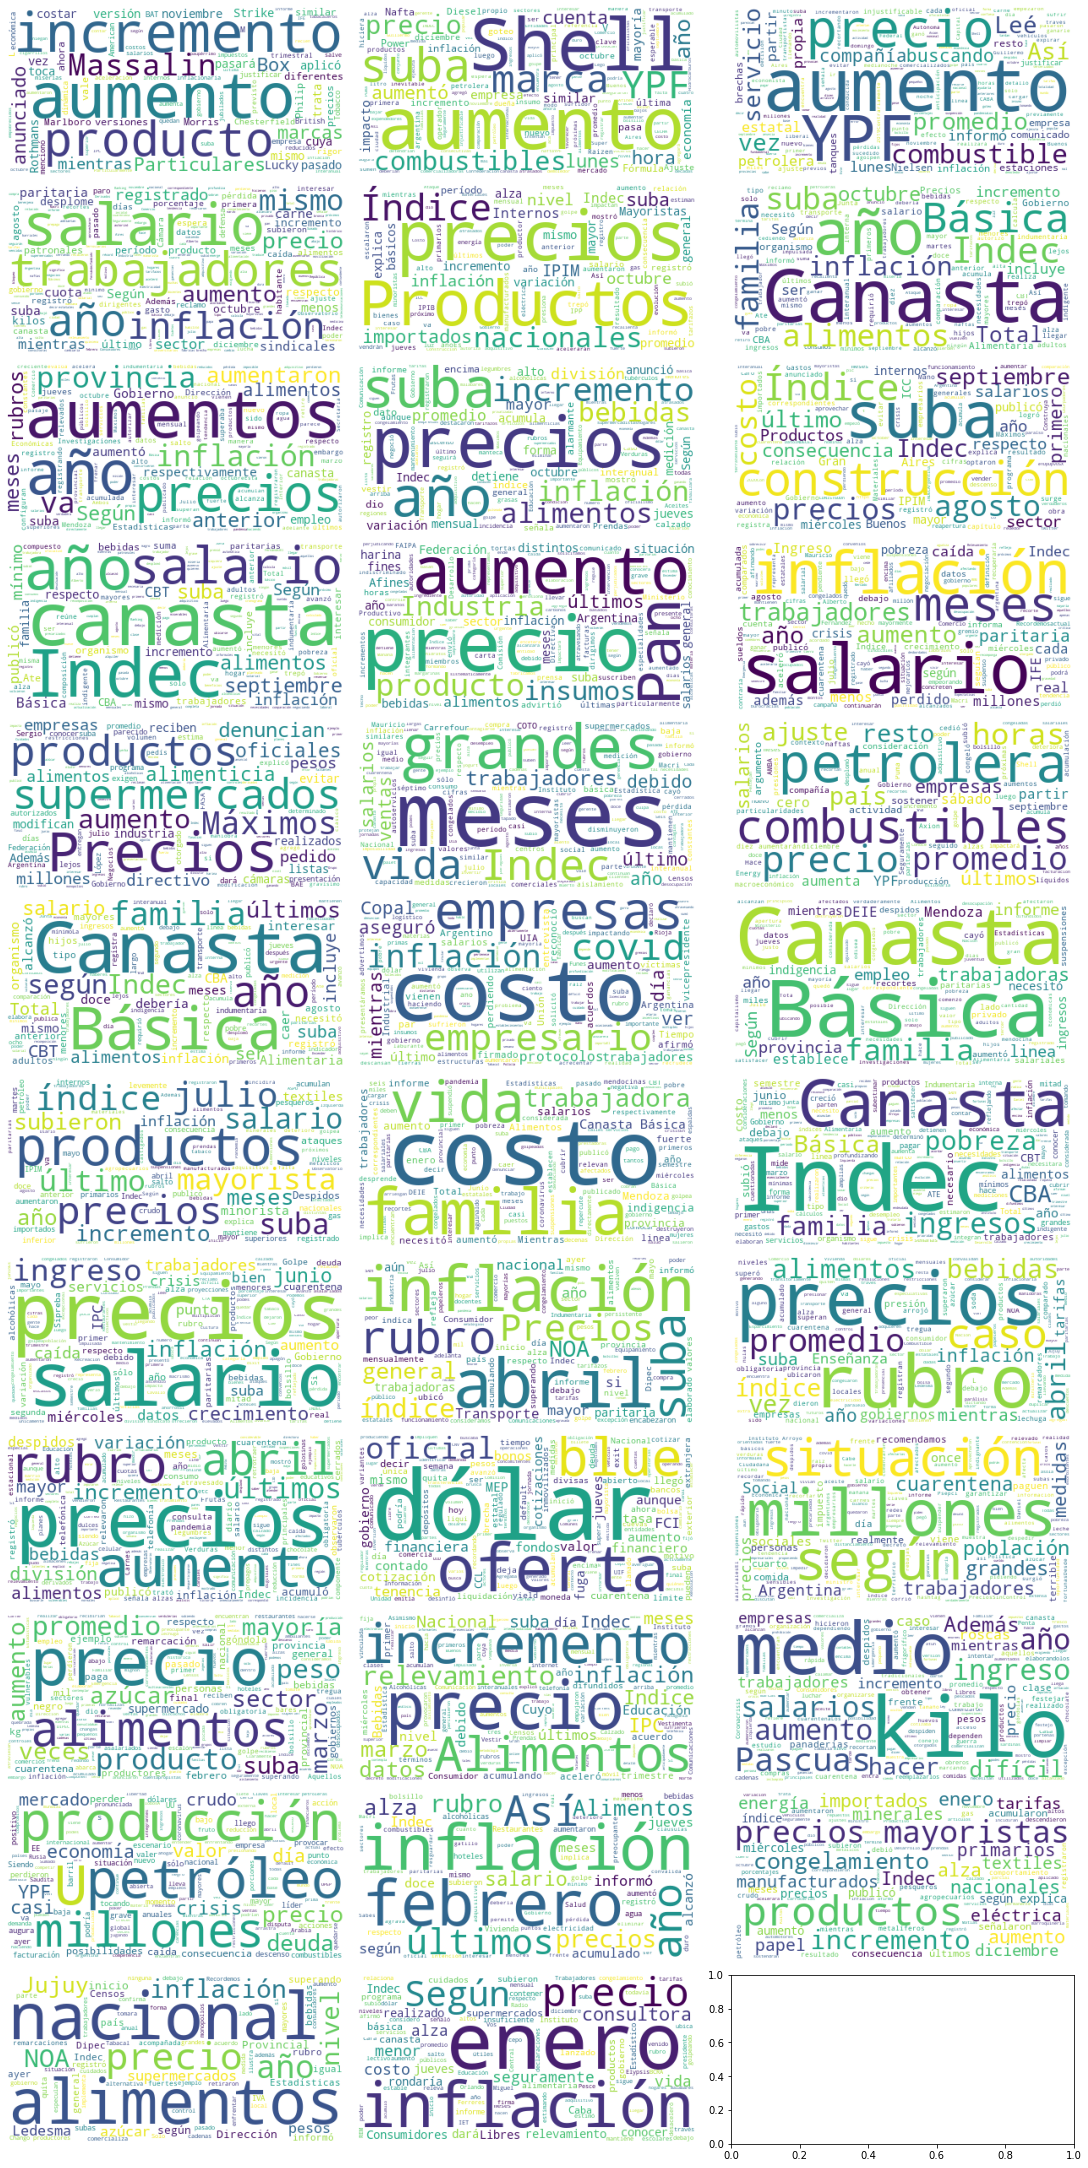

In [34]:
fig, axes = plt.subplots(nrows=12, ncols=3, constrained_layout=True, figsize=(15,30))

for index, (doc, ax) in enumerate(zip(df_inflation, axes.flatten())):
    cloud.generate(doc)
    ax.imshow(cloud)
    ax.axis('off')

plt.show()

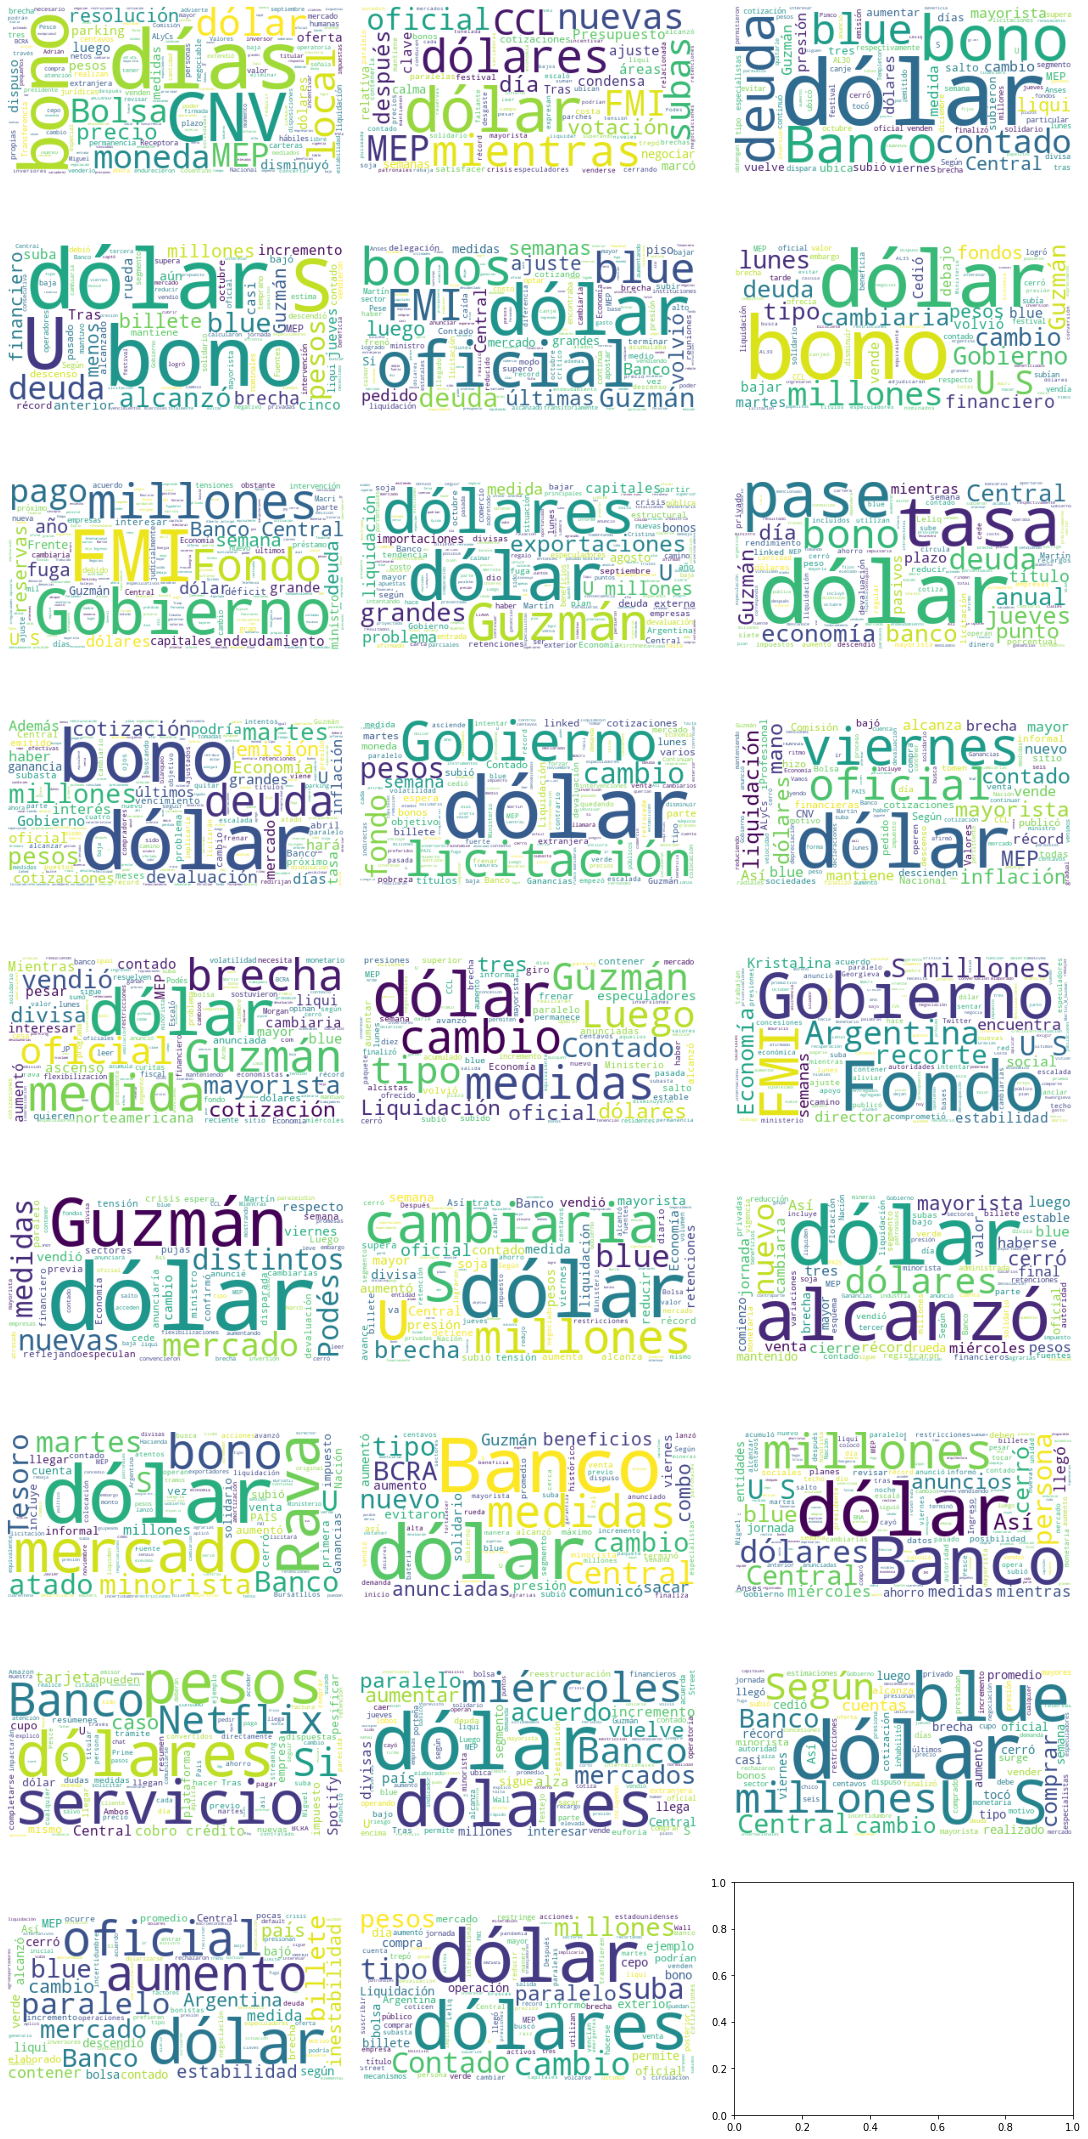

In [33]:
fig, axes = plt.subplots(nrows=9, ncols=3, constrained_layout=True, figsize=(15,30))

for index, (doc, ax) in enumerate(zip(df_exchange, axes.flatten())):
    cloud.generate(doc)
    ax.imshow(cloud)
    ax.axis('off')

plt.show()